In [1]:
from textblob import TextBlob
import tweepy
import twitter_credentials as tc
import sys
import re  
import pandas as pd


#auth
auth = tweepy.OAuthHandler(tc.API_KEY, tc.API_KEY_SECRET)
auth.set_access_token(tc.ACCESS_TOKEN, tc.ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

In [2]:
search_term = 'world cup 2022'
tweet_amount = 200

tweets = tweepy.Cursor(method=api.search_tweets, q=search_term, lang='en',until="2022-12-23").items(tweet_amount)

In [70]:
polarity = 0

positive = 0
negative = 0
neutral = 0

tweets_clean = []
for tweet in tweets:
    tweet_text = tweet.text.replace('RT', '')       #Remove the RT Tags
    if tweet_text.startswith(' @'):                  #Remove usernames
        position = tweet_text.index(':')
        tweet_text = tweet_text[position+2:]
        tweets_clean.append(tweet_text)
    if tweet_text.startswith('@'):                  #Remove usernames
        position = tweet_text.index(' ')
        tweet_text = tweet_text[position+2:]
        tweets_clean.append(tweet_text)
    #print(tweet_text)
    #Analysis
    analysis = TextBlob(tweet_text)
    tweet_polarity = analysis.polarity
    polarity += tweet_polarity
    if tweet_polarity>0:
        positive +=1
    elif tweet_polarity<0:
        negative+=1
    else:
        neutral+=1

print("polarity :", polarity)                            # We obtained A polarity of +54 which means the overal sentiment is very positive over the 200 tweets
print("positive tweets : ",positive)
print("negative tweets : ",negative)
print("neutral tweets : ",neutral)


polarity : 0
positive tweets :  0
negative tweets :  0
neutral tweets :  0


In [4]:
#print(tweets_clean)

["[Stream] 🎵\n\nEl video performance [정국 (Jung Kook) 'Dreamers' @ FIFA World Cup Qatar 2022 Opening Ceremony] en el canal BAN…", 'From @TheAthleticFC: "In this story, I am not neutral and will not pretend to be," writes Adam Crafton. "Here is a gay guy’s a…', '2010 🇪🇸\n2014 🇩🇪\n2018 🇫🇷\n2022 🇦🇷\n\nA reminder that EA Sports have now predicted the last FOUR World Cup winners using the FIFA si…', '2010 🇪🇸\n2014 🇩🇪\n2018 🇫🇷\n2022 🇦🇷\n\nA reminder that EA Sports have now predicted the last FOUR World Cup winners using the FIFA si…', 'Messi magic from the 2022 World Cup.\n\nThe flicks, hesitations, effortless dribbles, no look passes, assists &amp; goals. The…', 'Happy Heart Syndrome 🤦🤷\nhttps://t.co/4ro3psIRJa', 'Every day it sinks in that Messi won the 2022 World Cup and buried the GOAT debate forever. Ronaldo fans are yet to recov…', '2010 🇪🇸\n2014 🇩🇪\n2018 🇫🇷\n2022 🇦🇷\n\nA reminder that EA Sports have now predicted the last FOUR World Cup winners using the FIFA si…', 'Every day it sinks 

In [5]:
all_sentences = []
for word in tweets_clean:
    all_sentences.append(word)
    
all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


#print(lines)


In [6]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]           #remove punctuations

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

#print(lines2)

In [7]:
#Stemming

stem = []

for word in lines2:
    wordtostemlist = TextBlob(word).words
    for word2 in wordtostemlist:
        stem.append(word2.stem())
        
stem

['stream',
 'El',
 'video',
 'perform',
 'jung',
 'kook',
 'dreamer',
 'fifa',
 'world',
 'cup',
 'qatar',
 '2022',
 'open',
 'ceremoni',
 'en',
 'el',
 'canal',
 'ban',
 'from',
 'theathleticfc',
 'In',
 'thi',
 'stori',
 'I',
 'am',
 'not',
 'neutral',
 'and',
 'will',
 'not',
 'pretend',
 'to',
 'be',
 'write',
 'adam',
 'crafton',
 'here',
 'is',
 'a',
 'gay',
 'guy',
 'a',
 '2010',
 '2014',
 '2018',
 '2022',
 'A',
 'remind',
 'that',
 'EA',
 'sport',
 'have',
 'now',
 'predict',
 'the',
 'last',
 'four',
 'world',
 'cup',
 'winner',
 'use',
 'the',
 'fifa',
 'si',
 '2010',
 '2014',
 '2018',
 '2022',
 'A',
 'remind',
 'that',
 'EA',
 'sport',
 'have',
 'now',
 'predict',
 'the',
 'last',
 'four',
 'world',
 'cup',
 'winner',
 'use',
 'the',
 'fifa',
 'si',
 'messi',
 'magic',
 'from',
 'the',
 '2022',
 'world',
 'cup',
 'the',
 'flick',
 'hesit',
 'effortless',
 'dribbl',
 'no',
 'look',
 'pass',
 'assist',
 'amp',
 'goal',
 'the',
 'happi',
 'heart',
 'syndrom',
 'httpstco4ro3psir

In [8]:
#Remove StopWords
from nltk.corpus import stopwords

stem2 = []
stop_words = set(stopwords.words('english'))

for word in stem:
    if word not in stop_words:
        stem2.append(word)

stem2

['stream',
 'El',
 'video',
 'perform',
 'jung',
 'kook',
 'dreamer',
 'fifa',
 'world',
 'cup',
 'qatar',
 '2022',
 'open',
 'ceremoni',
 'en',
 'el',
 'canal',
 'ban',
 'theathleticfc',
 'In',
 'thi',
 'stori',
 'I',
 'neutral',
 'pretend',
 'write',
 'adam',
 'crafton',
 'gay',
 'guy',
 '2010',
 '2014',
 '2018',
 '2022',
 'A',
 'remind',
 'EA',
 'sport',
 'predict',
 'last',
 'four',
 'world',
 'cup',
 'winner',
 'use',
 'fifa',
 'si',
 '2010',
 '2014',
 '2018',
 '2022',
 'A',
 'remind',
 'EA',
 'sport',
 'predict',
 'last',
 'four',
 'world',
 'cup',
 'winner',
 'use',
 'fifa',
 'si',
 'messi',
 'magic',
 '2022',
 'world',
 'cup',
 'flick',
 'hesit',
 'effortless',
 'dribbl',
 'look',
 'pass',
 'assist',
 'amp',
 'goal',
 'happi',
 'heart',
 'syndrom',
 'httpstco4ro3psirja',
 'everi',
 'day',
 'sink',
 'messi',
 '2022',
 'world',
 'cup',
 'buri',
 'goat',
 'debat',
 'forev',
 'ronaldo',
 'fan',
 'yet',
 'recov',
 '2010',
 '2014',
 '2018',
 '2022',
 'A',
 'remind',
 'EA',
 'sport',


In [9]:
df = pd.DataFrame(stem2)
df = df[0].value_counts()           # Count the occurence of each distinct word
pd.set_option('display.max_rows', 100)

df

cup           168
world         167
2022          126
fifa           67
qatar          42
             ... 
asid            1
chancellor      1
sombrero        1
focus           1
undu            1
Name: 0, Length: 553, dtype: int64

In [10]:
# Words frequencies

from nltk.probability import FreqDist

fdist = FreqDist()

for word in df:
    fdist[word] += 1

fdist

FreqDist({1: 254, 2: 147, 3: 28, 4: 27, 7: 15, 6: 13, 5: 12, 8: 10, 17: 9, 22: 8, ...})

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

EA Sports                                  17
France 2022 FIFA World Cup Final Lusail    15
FIFA                                       13
La Cumbia De Los Trapos Argentina           9
France 2022                                 7
Ronaldo                                     6
Instagram                                   3
WorldCup                                    2
Fifa                                        2
PSG 2002                                    2
Party                                       2
Fifa World Cup                              2
Jung Kook Dreamers FIFA                     2
GodofWarRagnorok Gamersky Steam             2
the FIFA si Every day                       2
Qatars                                      2
MagicalMessi httpstcoxY1PPcnuSk             1
Akamais                                     1
the FIFA si The                             1
Cristiano Ronaldo                           1
Name: Word, dtype: int64


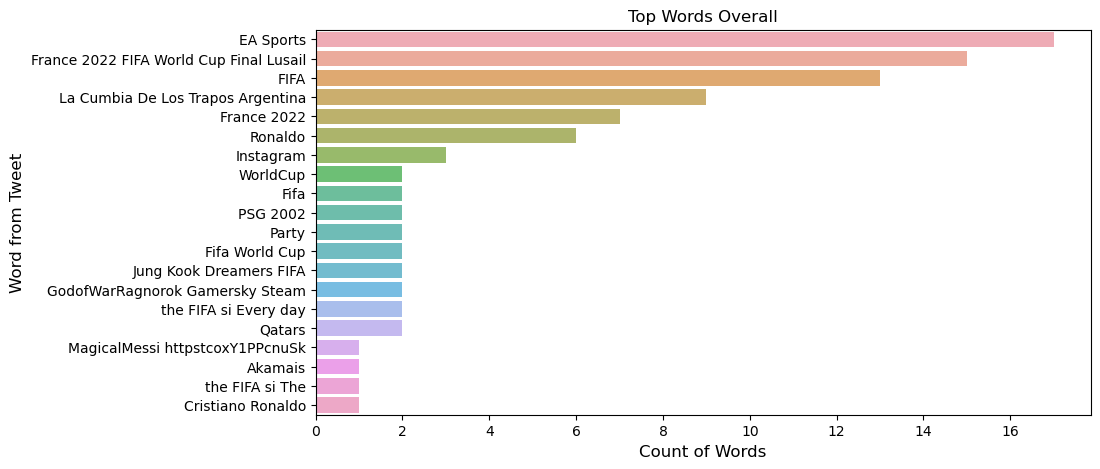

In [67]:
df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(x=df.values, y=df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [18]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [19]:
str1 = " " 
stem2 = str1.join(lines2)       # A String regrouping all words from lines2

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]      #list of tuples ("word", "entity") entity can be ORG, DATE, PERSON,EVENT...

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')           # Filter that contain only ORG entities

df7 = df7['Word'].value_counts()

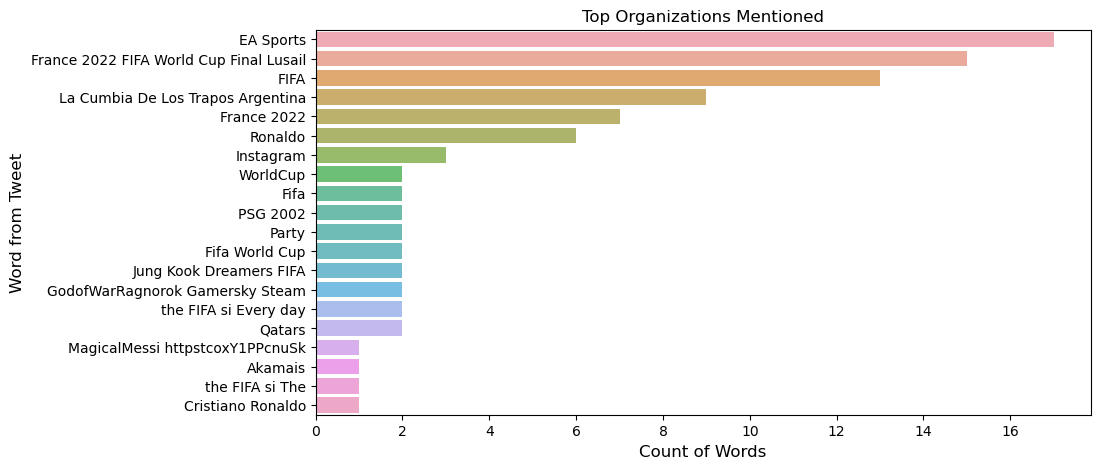

In [66]:
df = df7[:20,]                     # TOP 20 ORG
plt.figure(figsize=(10,5))
sns.barplot(x=df.values, y=df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [60]:
df8 = df6.where(df6['Entity']=='PERSON')
df8 = df8['Word'].value_counts()

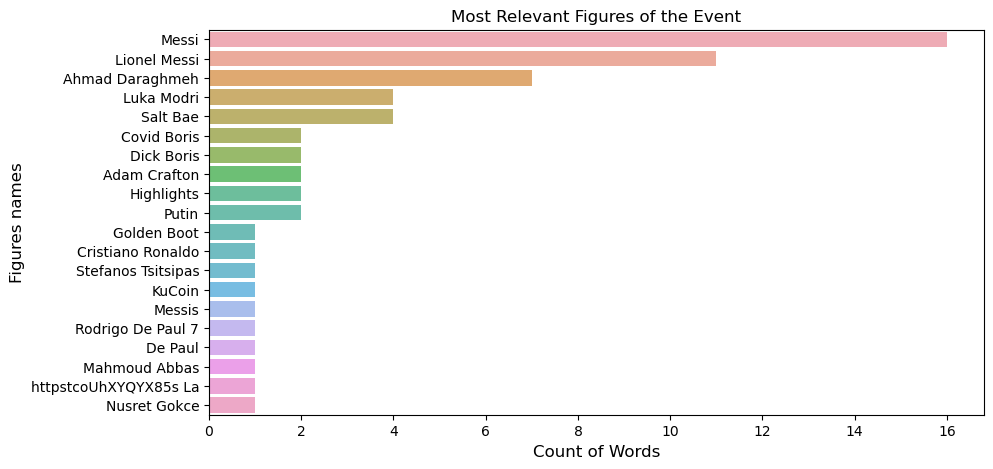

In [69]:
df = df8[:20,]
plt.figure(figsize=(10,5))
sns.barplot(x=df.values, y=df.index,alpha=0.8)
plt.title("Most Relevant Figures of the Event")
plt.ylabel("Figures names",fontsize=12)
plt.xlabel("Count of Words",fontsize=12)
plt.show()